In [3]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 

In [5]:
data = pd.read_csv("Datasets/digit-recognizer/train.csv")

In [6]:
data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data = np.array(data)

m,n = data.shape #4000 smtg , 784

np.random.shuffle(data)

data_dev=data[0:1000].T
X_dev=data_dev[1:n]
Y_dev=data_dev[0]

data_train=data[1000:m].T
X_train=data_train[1:n]
Y_train=data_train[0]


In [34]:
def init_params():
    W1 = np.random.rand(10,784)
    b1 = np.random.rand(10,1)
    W2 = np.random.rand(10,10)
    b2 = np.random.rand(10,1)
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(0,Z)    

'''
def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))
'''

#improved?
def softmax(Z):
    # Apply exponential function to each element
    exp_values = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Subtract max for numerical stability
    # Normalize
    return exp_values / np.sum(exp_values, axis=0, keepdims=True)

'''
def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(A1)
    return Z1,A1,Z2,A2
'''

#improved?
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)  # Apply softmax to Z2, not A1
    return Z1, A1, Z2, A2

def one_hot(Y): #there is a tensor flow function for this but we are going to do the mathematics 
    one_hot_Y = np.zeros((Y.size, Y.max()+1)) #converting categorical data into numeric data Y.size is m number of rows and Y.max is 9 we add 1 to it so now it becomes 10 which is the exact number of output categories we want
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y 

def deriv_relu(Z):
    return Z > 0


'''
def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2,1)
    dZ1 = W2.T.dot(dZ2) * deriv_relu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1,1)
    return dW1, db1, dW2, db2
'''

#improved?
def back_prop(Z1, A1, Z2, A2, W2, X, Y):  # Add X as parameter
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)  # Use axis=1 with keepdims
    dZ1 = W2.T.dot(dZ2) * deriv_relu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)  # Use axis=1 with keepdims
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha *db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha *db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y) / Y.size

'''
def gradient_descent(X , Y , iterations , alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2,X,Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%50 == 0:
            print("Iterations = ",i)
            print("Accuracy = ", get_accuracy(get_predictions(A2), Y))
        return W1, b1, W2, b2
'''

#improved?
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%50 == 0:
            print("Iterations = ", i)
            predictions = get_predictions(A2)
            print("Accuracy = ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2  

In [36]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 100, 0.1)

Iterations =  0
[8 8 8 ... 8 8 8] [3 6 4 ... 0 6 9]
Accuracy =  0.09697560975609756
Iterations =  50
[9 9 9 ... 9 9 9] [3 6 4 ... 0 6 9]
Accuracy =  0.09982926829268293


In [38]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [9]
Label:  3


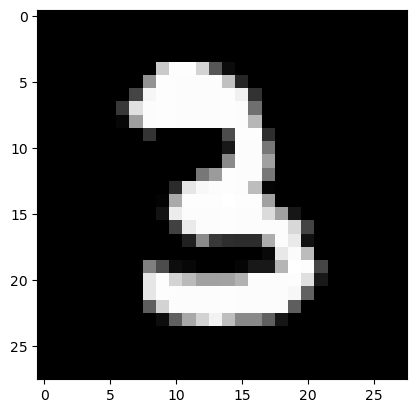

Prediction:  [9]
Label:  6


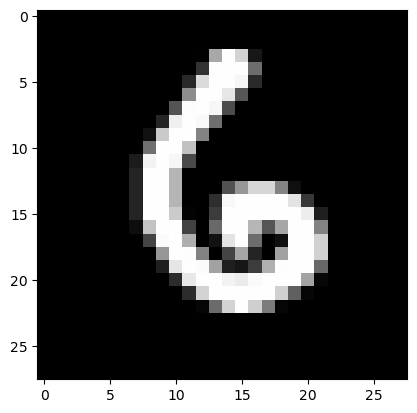

Prediction:  [9]
Label:  4


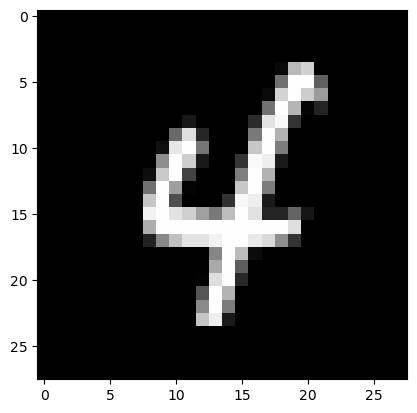

Prediction:  [9]
Label:  9


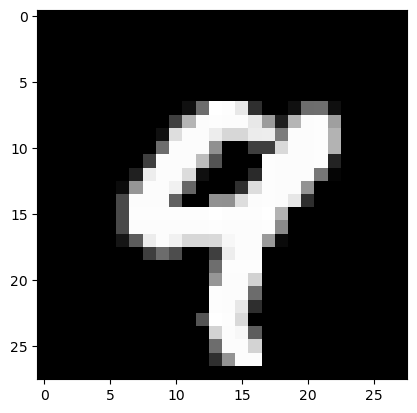

In [40]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)